# Tilastollinen prosessijohtaminen

Analyysi tilanteesta ennen parannuksia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import norm
%matplotlib inline

In [2]:
df_pre = pd.read_csv('./Data/MotoTech_pre.csv', sep=';')

Datassa on lueteltu levyjen paksuuksia (yksikkö Å). Otos koostuu kolmesta datapisteestä

In [3]:
df_pre['Sample mean'] = df_pre[['1','2','3']].mean(axis=1)
df_pre['Sample Range'] = (df_pre[['1','2','3']].max(axis=1) - df_pre[['1','2','3']].min(axis=1))
df_pre.head()

,Sample No.,1,2,3,Sample mean,Sample Range
0,1,3265,3097,3201,3187.666667,168
1,2,3273,3244,3125,3214.000000,148
2,3,3197,3174,3186,3185.666667,23
3,4,3215,3158,3122,3165.000000,93
4,5,3321,3200,3320,3280.333333,121


In [4]:
mean_range = df_pre['Sample Range'].mean(axis = 0)
mean_observation = df_pre['Sample mean'].mean(axis = 0)


https://www.itl.nist.gov/div898/handbook/pmc/section3/pmc321.htm

Engineering Statistics Handbook 

6.3.2.1 Shewhart X-bar and R charts

Valvontakorttien vakioita kirjan taulukosta. $(n=3)$

$D_4 = 2.574$

$D_3 = 0$

$A_2 =  1.023$


Xbar-kortille:\
$UCL = \bar{\bar{x}} + A_2\bar{R}$ \
  $CenterLine = \bar{\bar{x}}$ \
  $UCL = \bar{\bar{x}}-A_2\bar{R}$ \

R-kortille\
  $UCL = \bar{R}D_4$\
  $CenterLine = \bar{R}$\
  $LCL = \bar{R}D_3$


## Ennen parannuksia

In [5]:
#Xbar
x_ucl = mean_observation + (1.023 * mean_range)
x_cl = mean_observation
x_lcl = mean_observation - (1.023 * mean_range)

#R
r_ucl = mean_range * 2.574
r_cl = mean_range
r_lcl = mean_range * 0

[Text(0.5, 1.0, 'R valvontakortti'),
 Text(0, 0.5, 'Otoksen hajonta'),
 Text(0.5, 0, 'Otos'),
 (-50.0, 650.0)]

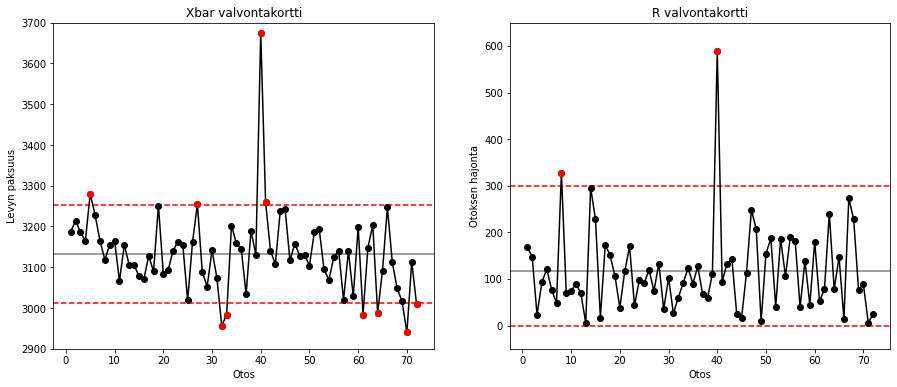

In [6]:
fig_pre, (ax_xbar, ax_r) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

#Pisteet jotka eivät ole kontrollirajojen sisällä
x_outofbounds = df_pre[df_pre['Sample mean']>x_ucl].append(df_pre[df_pre['Sample mean']<x_lcl])[['Sample No.','Sample mean']]
r_outofbounds = df_pre[df_pre['Sample Range']>r_ucl].append(df_pre[df_pre['Sample Range']<r_lcl])[['Sample No.','Sample Range']]




ax_xbar.axhline(x_ucl, color='red', ls='--')
ax_xbar.axhline(x_cl, color='gray')
ax_xbar.axhline(x_lcl, color='red', ls='--')
ax_xbar.plot(df_pre['Sample No.'],
            df_pre['Sample mean'],
            color='black',
            marker = 'o',
            ls='solid')
ax_xbar.scatter(x_outofbounds['Sample No.'],
               x_outofbounds['Sample mean'],
               marker='o', c='r', zorder=3)
ax_xbar.set(title='Xbar valvontakortti', ylabel='Levyn paksuus', xlabel='Otos', ylim=[2900, 3700])


ax_r.axhline(r_ucl, color='red', ls='--')
ax_r.axhline(r_cl, color='gray')
ax_r.axhline(r_lcl, color='red', ls='--')
ax_r.plot(df_pre['Sample No.'],
            df_pre['Sample Range'],
            color='black',
            marker = 'o',
            ls='solid')
ax_r.scatter(r_outofbounds['Sample No.'],
               r_outofbounds['Sample Range'],
               marker='o', c='r', zorder=3)
ax_r.set(title='R valvontakortti', ylabel='Otoksen hajonta', xlabel='Otos', ylim=[-50, 650])

Tilastollisesti tarkasteltuna prosessi ei ole hallinnassa, joten casessa mainitut paranukset ovat tarpeen. Prosessia voidaan tarkastella tarkemmin vasta kuin se hallinnassa.

## Parannusten jälkeen
Ensimmäisessä havaittiin erikoisia variaation lähteitä, jotka on nyt korjattu. Selvitetään onko prosessi nyt hallinnassa eli onko se stabiili.

[Text(0.5, 1.0, 'R valvontakortti'),
 Text(0, 0.5, 'Otoksen hajonta'),
 Text(0.5, 0, 'Otos'),
 (-50.0, 650.0)]

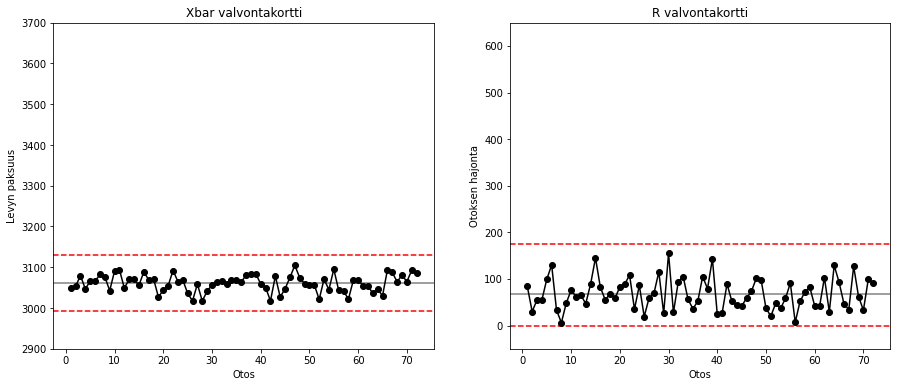

In [7]:
df_post = pd.read_csv('./Data/MotoTech_post.csv', sep=';')

df_post['Sample mean'] = df_post[['1','2','3']].mean(axis=1)
df_post['Sample Range'] = (df_post[['1','2','3']].max(axis=1) - df_post[['1','2','3']].min(axis=1))

post_mean_range = df_post['Sample Range'].mean(axis = 0)
post_mean_observation = df_post['Sample mean'].mean(axis = 0)

#Xbar
x_ucl = post_mean_observation + (1.023 * post_mean_range)
x_cl = post_mean_observation
x_lcl = post_mean_observation - (1.023 * post_mean_range)

#R
r_ucl = post_mean_range * 2.574
r_cl = post_mean_range
r_lcl = post_mean_range * 0



fig_post, (ax_xbar, ax_r) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

#Pisteet jotka eivät ole kontrollirajojen sisällä
x_outofbounds = df_post[df_post['Sample mean']>x_ucl].append(df_post[df_post['Sample mean']<x_lcl])[['Sample No.','Sample mean']]
r_outofbounds = df_post[df_post['Sample Range']>r_ucl].append(df_post[df_post['Sample Range']<r_lcl])[['Sample No.','Sample Range']]




ax_xbar.axhline(x_ucl, color='red', ls='--')
ax_xbar.axhline(x_cl, color='gray')
ax_xbar.axhline(x_lcl, color='red', ls='--')
ax_xbar.plot(df_post['Sample No.'],
            df_post['Sample mean'],
            color='black',
            marker = 'o',
            ls='solid')
ax_xbar.scatter(x_outofbounds['Sample No.'],
               x_outofbounds['Sample mean'],
               marker='o', c='r', zorder=3)
ax_xbar.set(title='Xbar valvontakortti', ylabel='Levyn paksuus', xlabel='Otos', ylim=[2900, 3700])


ax_r.axhline(r_ucl, color='red', ls='--')
ax_r.axhline(r_cl, color='gray')
ax_r.axhline(r_lcl, color='red', ls='--')
ax_r.plot(df_post['Sample No.'],
            df_post['Sample Range'],
            color='black',
            marker = 'o',
            ls='solid')
ax_r.scatter(r_outofbounds['Sample No.'],
               r_outofbounds['Sample Range'],
               marker='o', c='r', zorder=3)
ax_r.set(title='R valvontakortti', ylabel='Otoksen hajonta', xlabel='Otos',ylim=[-50, 650])

Prosessi on nyt stabiili. Nyt prosessin kyvykkyyttä voidaan mielekkäästi tarkastella. Tarkastellaan prosessin kyvykkyyttä päästä haluttuun 2900 Å - 3100 Å spesifikaatioon.


## Prosessin kyvykkyys

Text(3105, 0.01, '$USL = 3100$ Å')

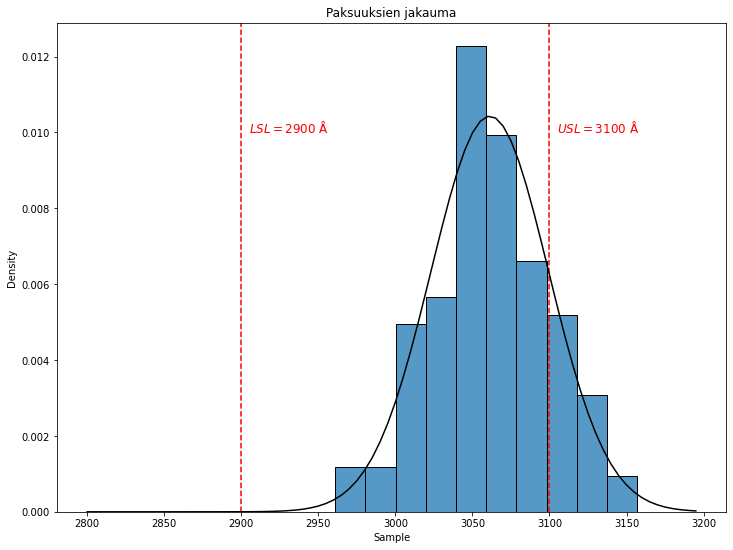

In [8]:
USL = 3100 #ylempi speksi
LSL = 2900 #alempi speksi

all_samples = pd.DataFrame({'Sample':df_post[['1','2','3']].to_numpy().reshape(-1)})
all_samples_mean = all_samples.Sample.mean(axis=0)
all_samples_std = np.std(all_samples.Sample.to_numpy())

norm = norm(all_samples_mean, all_samples_std)

fig1, ax1 = plt.subplots(figsize=(12,9))
sns.histplot(all_samples, x='Sample', bins=10, kde=False,stat='density',ax=ax1)
ax1.axvline(USL, color='red', ls='--')
ax1.axvline(LSL, color='red', ls='--')
#Jakauma
kde = gaussian_kde(all_samples['Sample'])
x = [n for n in range(2800,3200,5)]
y = [norm.pdf(n) for n in x]
ax1.plot(x, y, color='black')
ax1.set(title="Paksuuksien jakauma")
ax1.text(2905, .010, r'$LSL = 2900$ Å', {'color': 'r', 'fontsize': 12})
ax1.text(3105, .010, r'$USL = 3100$ Å', {'color': 'r', 'fontsize': 12})